In [8]:
# 2018-07-13
# A. Pendleton
# Processing Kallisto Transcript Assessments
# By tissue (merged samples per tissue)
# -- PASA transcripts with 100kb max intron size

In [9]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput
import glob
from scipy import stats
import re
from matplotlib_venn import venn3, venn3_circles
from collections import OrderedDict


def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)
# TO REMOVE TOP AND RIGHT AXIS OF PLOTS
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [10]:
def get_sample_info():
    #Reading in the RNA-Seq library IDs
    sampleInfo = '/home/ampend/links/kidd-lab/ampend-projects/Novel_Sequence_Analysis/rna-seq/SampleInfoTable.txt'
    sampleDict, tissueDict, samples = {}, {}, []

    for line in open(sampleInfo, 'r'):
        if 'Bio' in line: #skips header
            continue
        line=line.rstrip().split()
        ID = line[4]
        #Rename some tissues to shorter name
        tissue = line[5]
        
        if 'SmoothMuscle' in tissue:
            shortTissue = 'SM'
        if 'Unidentified' in tissue:
            shortTissue = 'NA'
        if 'Blood' in tissue:
            shortTissue = 'BL'
        if 'Brain' in tissue:
            shortTissue = 'BR'
        if 'Heart' in tissue:
            shortTissue = 'HT'
        if 'Ovary' in tissue:
            shortTissue = 'OV'
        if 'Skin' in tissue:
            shortTissue = 'SK'
        if 'Kidney' in tissue:
            shortTissue = 'KD'
        if 'Testis' in tissue:
            shortTissue = 'TS'
        if 'Liver' in tissue:
            shortTissue = 'LV'
        if 'Lung' in tissue:
            shortTissue = 'LG'
        sampleDict[ID] = []
        sampleDict[ID].append(tissue)
        sampleDict[ID].append(shortTissue)
        samples.append(ID)
        
        if tissue not in tissueDict.keys():
            tissueDict[tissue] = []
        tissueDict[tissue].append(ID)

    print('%i samples added to a sample array from the following tissues:\n' % len(samples))

    genomes = ['zoey-2.3','canFam3.1-noY']

    for tissue in tissueDict.keys():
        print(tissue)

    return sampleDict, tissueDict, genomes



## Reading in Library/Sample Information

In [14]:
#Reading in library information
sampleDict, tissueDict, genomes = get_sample_info()

samples,tissues=[],[]

for key in sampleDict.keys():
    samples.append(key)
for tissue in tissueDict.keys():
    tissues.append(tissue)

42 samples added to a sample array from the following tissues:

Heart
SmoothMuscle
Unidentified
Kidney
Skin
Testis
Lung
Ovary
Blood
Liver
Brain


## Reading in Kallisto Results

In [12]:
# function to count elements within given range
def countInRange(arr, n, x, y):
    # initialize result
    count = 0 
    for i in range(n):
        # check if element is in range
        if (arr[i] >= x and arr[i] < y):
            count += 1
    return count
def plot_tissue_tpms(arr,tissue,plotFile):
    #PLOT
    fig = plt.figure(figsize=(12, 8)) #Set up subplots for below distributions
    ax = fig.add_subplot(111)
    _ = plt.hist(tpms, 1500, facecolor='green', alpha=0.75)
    plt.title('Zoey Transcript TPMs - %s' % tissue)
    plt.xlabel('TPM')
    plt.ylabel('Count')
    plt.xlim(1,10000)
    plt.ylim(0,200)
    simpleaxis(ax)
    plt.tight_layout()
    plt.savefig(plotFile,transparent=True) #save    
    
    #Print out stats
    print('\n####Tissue -- %s' % tissue)
    print('Minimum TPM = ', min(tpms))
    print('Maximum TPM = ', max(tpms))
    print('Average TPM = ', np.mean(tpms))
    print('Median TPM = ', np.median(tpms))

def get_size_ranges(arr):
    count = countInRange(tpms, len(tpms), 0, .9999)
    print('%i less than 1.0 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 1, 10)
    print('%i between 1-10 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 10, 50)
    print('%i less than 10-50 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 50, 100)
    print('%i between 50-100 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 100, 150)
    print('%i between 100-150 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 150, 200)
    print('%i between 150-200 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 200, 250)
    print('%i between 200-250 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 250, 300)
    print('%i between 250-300 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 300, 350)
    print('%i between 300-350 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 350, 1000000000)
    print('%i over 350 tpm' % count)

In [13]:
"""
OLD DATA
kalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/'
resultsDir = kalDir + 'results/'

samplesProcessed = []
for files in glob.glob(resultsDir + 'SRR*'):
    samplesProcessed.append(files.replace(resultsDir,''))
    
print('%i samples processed through Kallisto' % len(samplesProcessed))
"""

42 samples processed through Kallisto


In [16]:

tissuesProcessed = []
for tissue in tissues:
    tissuesProcessed.append(tissue)
for files in glob.glob(resultsDir + 'SRR*'):
    samplesProcessed.append(files.replace(resultsDir,''))
    
print('%i samples processed through Kallisto' % len(tissuesProcessed))

NameError: name 'resultsDir' is not defined


####Tissue -- Heart
Minimum TPM =  0.0
Maximum TPM =  42238.3
Average TPM =  40.1751658602
Median TPM =  1.0773
12241 less than 1.0 tpm
5873 between 1-10 tpm
4435 less than 10-50 tpm
1024 between 50-100 tpm
395 between 100-150 tpm
214 between 150-200 tpm
150 between 200-250 tpm
84 between 250-300 tpm
73 between 300-350 tpm
402 over 350 tpm

####Tissue -- SmoothMuscle
Minimum TPM =  0.0
Maximum TPM =  106218.0
Average TPM =  40.1751762515
Median TPM =  0.568984
14295 less than 1.0 tpm
5697 between 1-10 tpm
3251 less than 10-50 tpm
754 between 50-100 tpm
245 between 100-150 tpm
115 between 150-200 tpm
81 between 200-250 tpm
77 between 250-300 tpm
52 between 300-350 tpm
324 over 350 tpm

####Tissue -- Unidentified
Minimum TPM =  0.0
Maximum TPM =  61691.2
Average TPM =  40.1751693813
Median TPM =  2.96408
7985 less than 1.0 tpm
9081 between 1-10 tpm
5380 less than 10-50 tpm
1190 between 50-100 tpm
402 between 100-150 tpm
216 between 150-200 tpm
118 between 200-250 tpm
72 between 250-300 

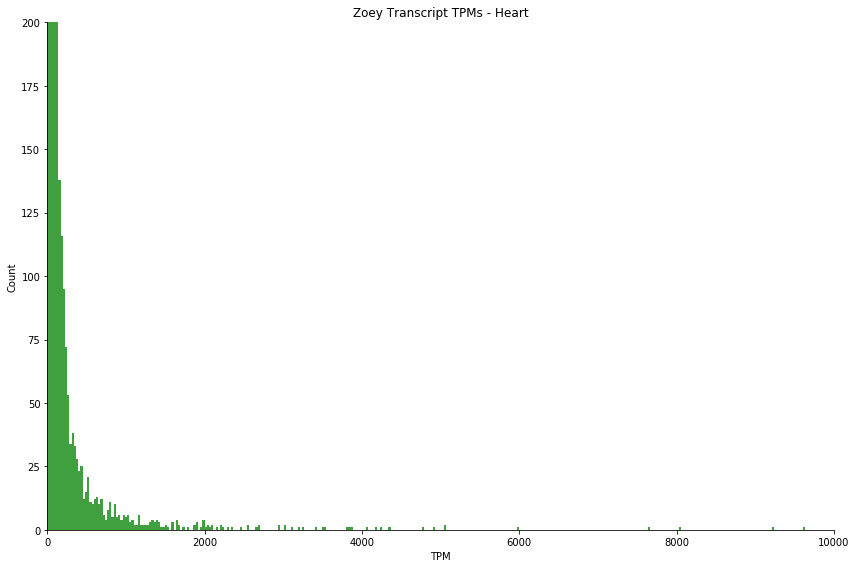

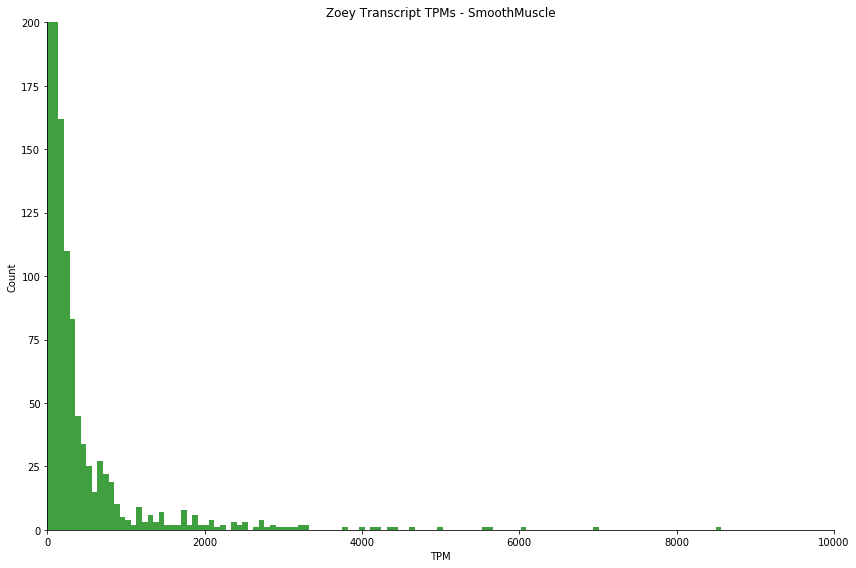

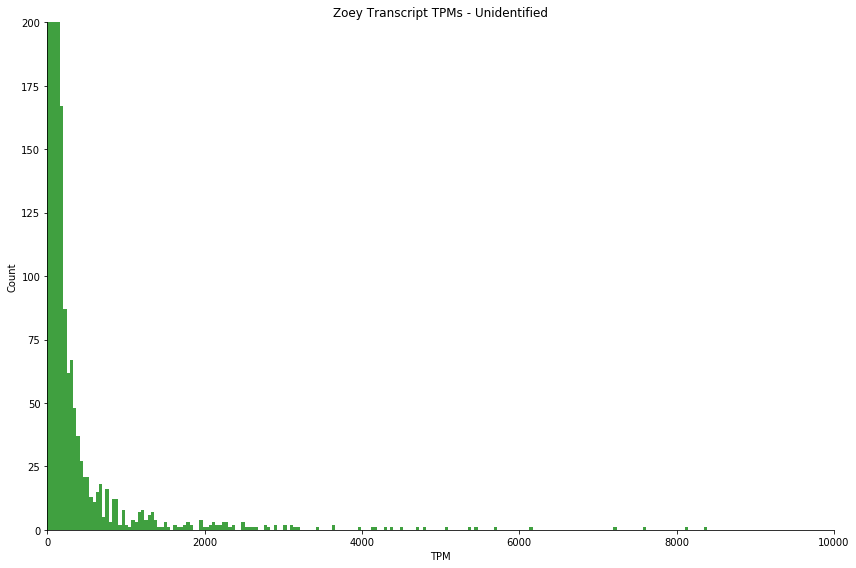

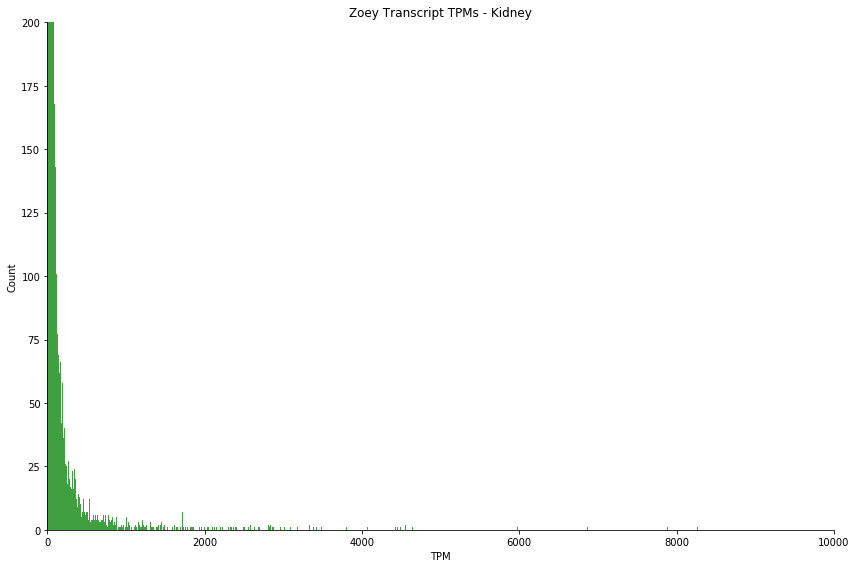

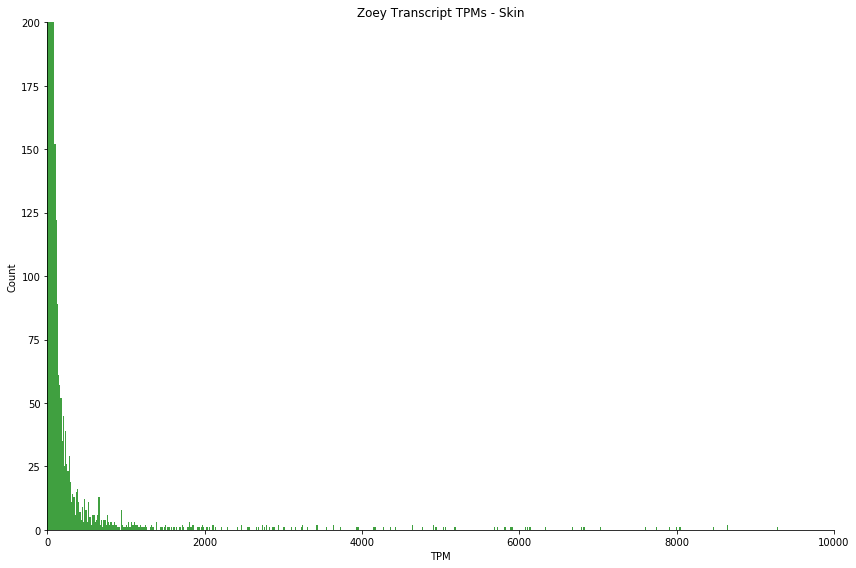

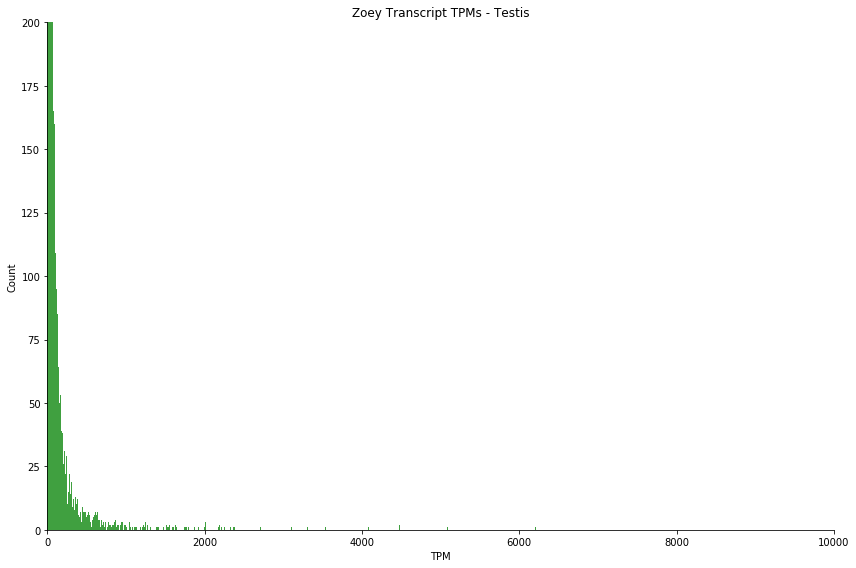

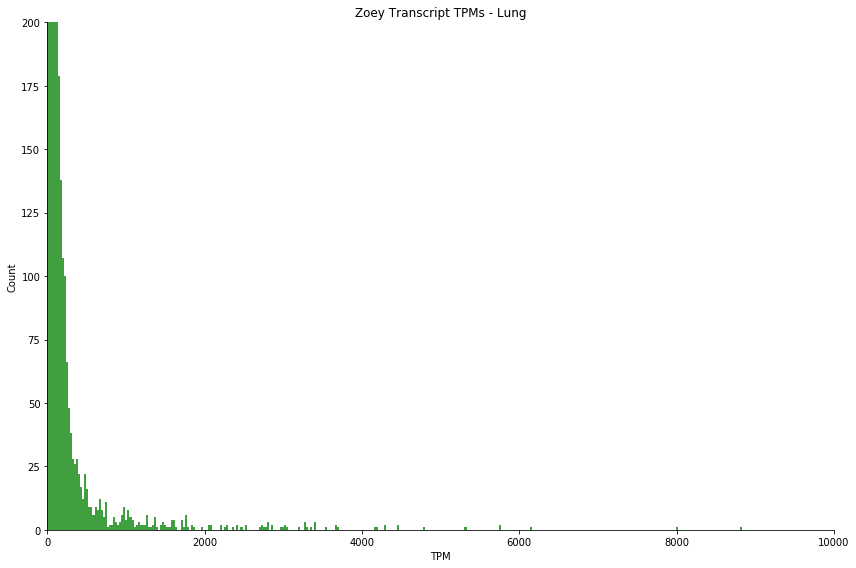

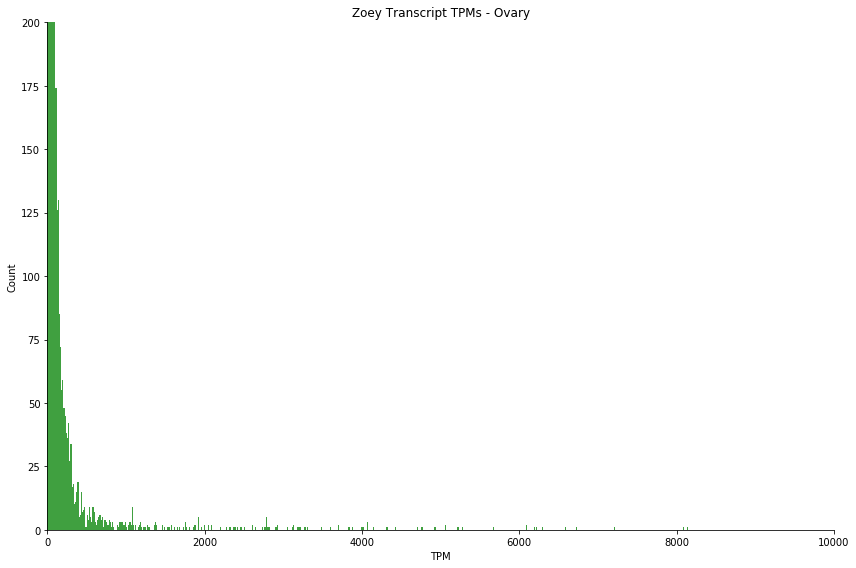

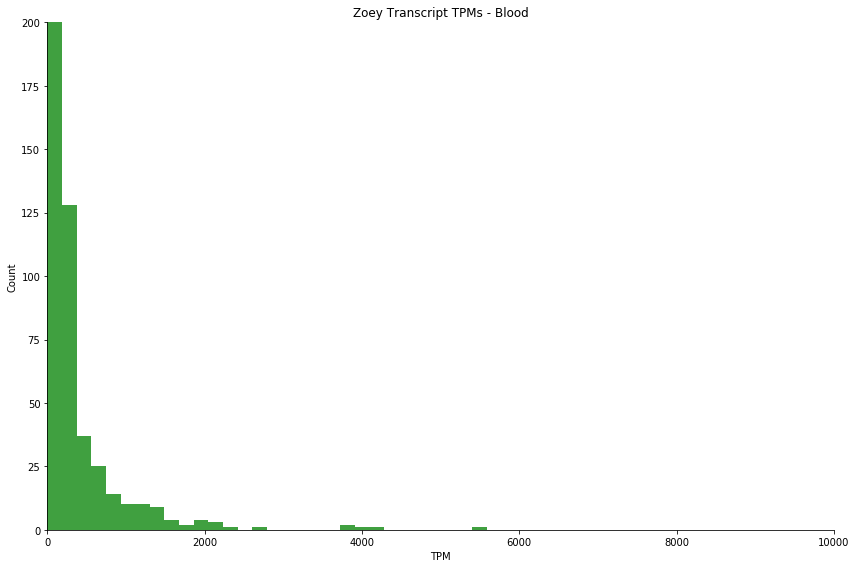

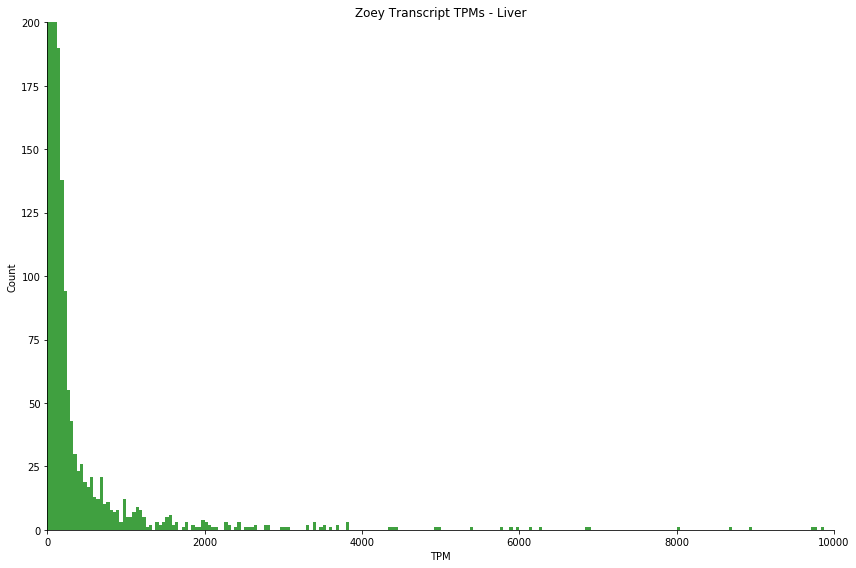

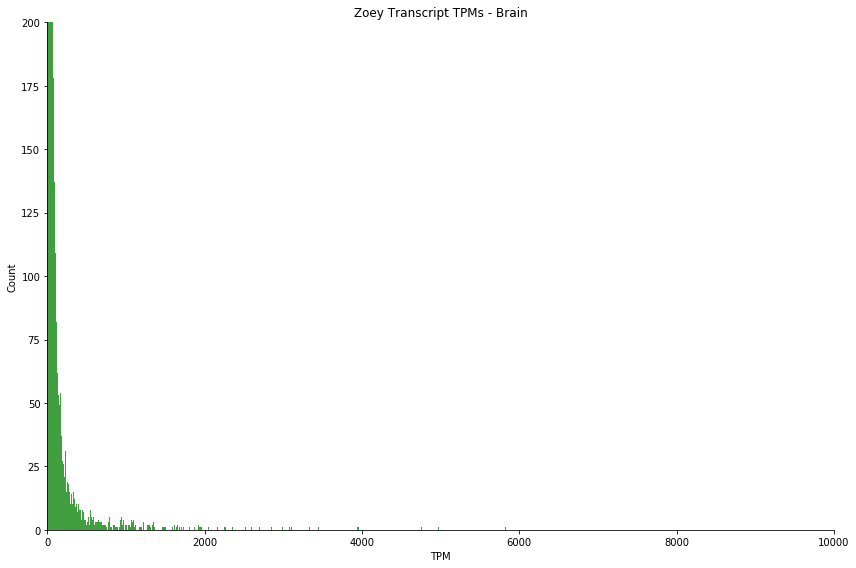

In [18]:
#CALCULATE STATS AND DRAW PLOTS PER SAMPLE
tissueCount = 0

tpmDict = {}

kalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Kalisto/'
resultsDir = kalDir + 'results/'


plotDir = resultsDir + '../plots/'
for tissue in tissueDict.keys():
    tissueCount += 1
    tpms = []
    
    inFile = resultsDir + tissue + '/' + 'abundance.tsv'
    for line in open(inFile,'r'):
        if 'target_id' in line:
            continue
        line=line.rstrip().split('\t')
        transcript = line[0]
        shortID = line[0].split('::')[1]
        tpm = float(line[4])
        #if only the first sample, create key for the gene
        if tissueCount == 1:
            #0 = ALL library expression TPMs
            #1 = Only libraries with TPM > 1.0
            tpmDict[shortID] = [[],[]]
        tpmDict[shortID][0].append(tpm) #add TPM to total dictionary      
        
        #If expressed at tpm > 1, add to dictionary
        if tpm > 1.0:
            tpmDict[shortID][1].append(tpm) #add TPM to total dictionary      

        tpms.append(tpm) #add TPM to per saple array for stats (below)
    
    #Plot the TPM distribution
    plotFile = plotDir + tissue + '_TPM_Histogram.png'
    plot_tissue_tpms(tpms,tissue,plotFile)
    
    get_size_ranges(tpmDict[shortID][0])
   

### Identify how many transcripts are NOT expressed in at least one library with TPM >1


In [19]:
count1,count2,count3,count10,countAll = 0,0,0,0,0
counts = []
outFileDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Kalisto/results/'
"""outfile = outFileDir + 'ExpressedInAtLeastOneSample_KallistoTPMEstimates_TrinityTranscripts.txt'
outfile2 = outFileDir + 'ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.txt'
outfile2 = outFileDir + 'ExpressedInAtLeastTHREESample_KallistoTPMEstimates_TrinityTranscripts.txt'

outFile = open(outfile,'w')
outFile2 = open(outfile2,'w')
"""

for transcript in tpmDict:
    libraryCount = len(tpmDict[transcript][1])
    if libraryCount >= 1:
        count1+=1
        #outFile.write(transcript + '\n')
    if libraryCount >= 2:
        count2+=1
        #outFile2.write(transcript + '\n')
    if libraryCount >= 3:
        count3+=1
        #outFile2.write(transcript + '\n')
    if libraryCount == 11:
        countAll += 1
    counts.append(libraryCount)

print('%i transcripts expressed in ONE or more library' % count1)
print('%i transcripts expressed in TWO or more libraries' % count2)
print('%i transcripts expressed in THREE or more libraries'% count3)
print('%i transcripts expressed in ALL libraries'% countAll)


#outFile.close()
#outFile2.close()


23565 transcripts expressed in ONE or more library
20935 transcripts expressed in TWO or more libraries
17783 transcripts expressed in THREE or more libraries
6174 transcripts expressed in ALL libraries


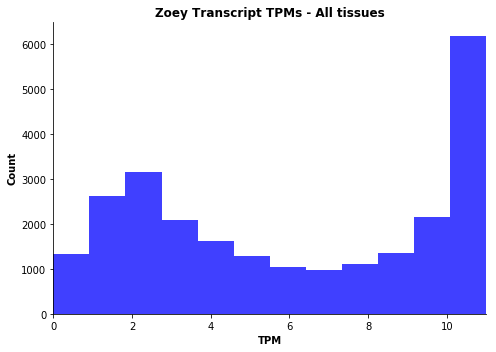

In [20]:
fig = plt.figure(figsize=(7, 5)) #Set up subplots for below distributions
ax = fig.add_subplot(111)
_ = plt.hist(counts, 12, facecolor='blue', alpha=0.75)
plt.title('Zoey Transcript TPMs - All tissues',fontweight='bold')
plt.xlabel('TPM',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xlim(0,11)
simpleaxis(ax)
plt.tight_layout()
#plt.savefig(plotFile,transparent=True) #save

# Making UCSC Track for Per Tissue Kallisto Results

track type=barChart name="barChart Example One" description="A barChart file" barChartBars="adiposeSubcut breastMamTissue colonTransverse muscleSkeletal wholeBlood" visibility=pack
browser position chr14:95,086,228-95,158,010
chr14	95086227	95158010	ENSG00000100697.10	999	-	DICER1	5	10.94,11.60,8.00,6.69,4.89
chr14	95181939	95319906	ENSG00000165959.7	999	-	CLMN	5	7.08,9.53,9.32,1.38,1.68
chr14	95417493	95475836	ENSG00000176438.8	999	-	SYNE3	5	7.29,3.73,0.74,0.35,1.39


### First need to find out where each transcript is... make a dictionary with gene as key

In [1]:
bedFile = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/NonRedundant_NoRMIntersect_FilteredGeneSet/TotalSet_NoRMSingleExons_AllMultiExons.bed'

posDict = {}

for line in open(bedFile,'r'):
    line=line.rstrip().split('\t')
    gene = line[3]
    shortID = line[3].split('::')[1]
    chrom,start,end = line[0],line[1],line[2]
    orient = str(line[5])

    if shortID not in posDict.keys():
        posDict[shortID] = {}
        posDict[shortID] = [chrom,start,end,gene,orient]
    else:
        print('Error -- redundant gene model -- Check')
        print(shortID)
        break
print('added coordinates in zoey2.3 to %i genes ' % len(posDict.keys()))


added coordinates in zoey2.3 to 24891 genes 


In [4]:
kalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Kalisto/'
trackDir = kalDir + 'UCSC_Tracks/'
resultsDir = kalDir + 'results/'

trackFile = open(trackDir + 'ForUCSC_PerTissueExpression.barChart','w')
for gene in tpmDict.keys():
    chrom,start,end,orient = posDict[gene][0],posDict[gene][1],posDict[gene][2],posDict[gene][4]
    tpms = ','.join(map(str, tpmDict[gene][0])) 
    score = '999' #default
    trackFile.write('%s\t%s\t%s\t%s\t%s\t%s\t%s\t%i\t%s\n' % (chrom,start,end,gene,score,orient,gene,len(tpmDict[gene][0]),tpms))
    #chr14 95086227 95158010 ENSG00000100697.10 999 - DICER1 5 10.94,11.60,8.00,6.69,4.89 93153 26789

trackFile.close()

NameError: name 'tpmDict' is not defined

# CD-HIT-EST Clustering

In [25]:
## Write commands to perform CD-HIT-EST on transcripts expressed in at least 2/42 libraries
outDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/CD-HIT-EST/'

cmdFile = open(outDir + 'scripts/' + 'CD-HIT-EST_Commands_ExpressedInAtLeast2Libraries.cmds','w')

#I generated an index file for this fasta file using samtools faidx Trinity-GG.fasta
trinityFastaIndexFile = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/AllLibraries_trinity/Trinity-GG.fasta.fai'

#Generated from above-- are expressed in 2+ libraries
desiredFastaFile = outfile2

#Output FASTA file of expressed in 2+ libraries 
outFasta = outfile2.replace('.txt','.fa')

#make input file
cmd = 'xargs samtools faidx %s < %s >> %s' % (trinityFastaIndexFile.replace('.fai',''),outfile2,outFasta)
print(cmd)
runCMD(cmd)



xargs samtools faidx /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/AllLibraries_trinity/Trinity-GG.fasta < /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/results/ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.txt >> /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/results/ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.fa


In [27]:
#where to write
outDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/CD-HIT-EST/results/'

cmd = 'cd-hit-est '
cmd += '-i %s ' % outFasta
cmd += '-o %sZoey-Trinity_Expressed2LibrariesOrMore_c90_n8 ' % outDir
cmd += '-c 0.90 -n 8 -M 2000 '
print(cmd)
#-o /nfs/turbo/jmkiddscr/ampend-projects/Zoey_Genome_Project/CD-HIT/results/Zoey-Trinity_c90_n8.out -c 0.90 -n 8 -M 2000' | qsub -l mem=8gb,walltime=300:00:0 -q fluxod -A jmkidd_fluxod -N Zoey_CD-HIT-EST_trinity_c90_n8 -j oe -V 


cd-hit-est -i /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/results/ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.fa -o /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/CD-HIT-EST/results/Zoey-Trinity_Expressed2LibrariesOrMore_c90_n8 -c 0.90 -n 8 -M 2000 


## How many transcripts expressed in at least one library are eliminated through CD-HIT-EST clustering?

#### Read in CD-HIT-EST results

In [12]:
cdHitDir = '/home/ampend/links/kidd-lab-scratch/ampend-projects/Zoey_Genome_Project/CD-HIT/results/'

inFile = cdHitDir + 'Zoey-Trinity_c95_n8.out' #95% identity

missing = []

for line in open(inFile,'r'):
    line=line.rstrip().split()
    if '>TRIN' not in line[0]:
        continue
    transcript = line[0].replace('>','')
    #cdHit95List.append(transcript)
    if transcript in tpmDict.keys():
        tpmDict[transcript][1] = 'Pass'
    else:
        missing.append(transcript)
        print(transcript)
        break
#print('%i transcripts added to list that remained after filtration of transcripts >95%% identical' % len(cdHit95List))
print('%i missing' % len(missing))



TRINITY_DN69561_c0_g1_i1
1 missing


#### How many of the expressed transcripts remain after eliminating those from the CD-HIT-EST results

In [ ]:
Pass,Fail = 0,0 

for transcript in tpmDict:
    if 'Pass' == tpmDict[transcript][1]:
        Pass+=1 
    else:
        Fail+=1
print('%i transcripts pass CD-HIT-EST 95% filtration' % Pass)
print('%i transcripts FAIL CD-HIT-EST 95% filtration' % Fail)


# UCSC TRACKS

### Define color scheme for TPMs for UCSC tracks

In [1]:
## Defining the color scheme baed on TPMs 
tpm_ranges = [(0,1),(1,10),(10,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(350,1000000000000)]
colors = ['grey','black','blue','darkgreen','limegreen','orangeyellow','darkorange','red','darkred','pink']
rgb = [(166, 166, 166),(0, 0, 0),(0, 102, 0),(255, 153, 0),(0, 255, 0),(204, 153, 0),(255, 102, 0),(255, 0, 0),(153, 0, 51),(204, 0, 153)]

## Defining Paths to Trinity Outputs

In [5]:
trinBlatDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/AllLibraries_trinity/BLAT/'



In [ ]:
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

### An example of how to use make_cmap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
colors = [(255,0,0), (255,255,0), (255,255,255), (0,157,0), (0,0,255)] # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

ax = fig.add_subplot(312)
colors = [(1,1,1), (0.5,0,0)] # This example uses the arithmetic RGB
### If you are only going to use your colormap once you can
### take out a step.
plt.pcolor(np.random.rand(25,50), cmap=make_cmap(colors))
plt.colorbar()

ax = fig.add_subplot(313)
### Create an array or list of positions from 0 to 1.
position = [0, 0.3, 1]
plt.pcolor(np.random.rand(25,50), cmap=make_cmap(colors, position=position))
plt.colorbar()

plt.show()